# Authors: 
**Alejandro C Parra** https://github.com/athanatos96


**Atreish Ramlakhan** https://github.com/atreish


**Ruslan Gokhman** https://github.com/Gokhman07

In [2]:
from typing import List, Optional

# 98. Validate Binary Search Tree

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left subtree of a node contains only nodes with keys less than the node's key.
The right subtree of a node contains only nodes with keys greater than the node's key.
Both the left and right subtrees must also be binary search trees.

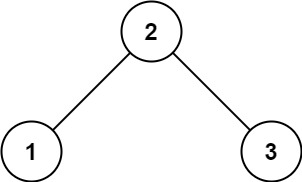
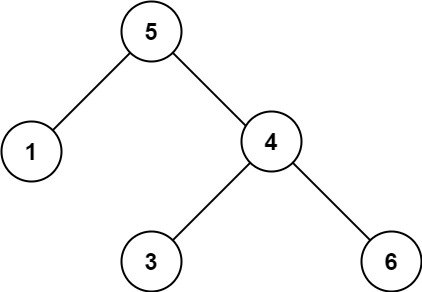

In [3]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        self.subtree_max_val = None
        self.subtree_min_val = None
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        
        def rec(node):
            if not node:
                # This is not a node, we return None as left and Right values,
                # anf a True, as this is so far a Valid tree
                return (None,None, True)

            # explore left
            min_val, max_val, valid = rec(node.left)
            '''
            min_val is the min value of the subtree
            max_val is the max value of the subtree
            valid is a bollean value
            '''
            # If the subtree is invalid we return invalid, and we no longer care
            # about the left or right values
            if not valid: return (None,None, valid)

            # If there are left nodes
            if min_val != None and max_val != None:
                # there is a left node
                if max_val >= node.val:
                    # This is not a valid tree
                    return (None, None, False)
                else:
                    # This left subtree is valid
                    node.subtree_max_val = max(max_val, node.val)
                    node.subtree_min_val = min(min_val, node.val)
            else:
                # there are no Left nodes of this node
                node.subtree_max_val = node.val
                node.subtree_min_val = node.val


            # explore right
            min_val, max_val, valid = rec(node.right)
            # If the subtree is invalid we return invalid, and we no longer care
            # about the left or right values
            if not valid: return (None,None, valid)

            # If there are right nodes
            if min_val != None and max_val != None:
                 # there is a right node
                if min_val <= node.val:
                    # This is not a valid tree
                    return (None, None, False)
                else:
                    # This right subtree is valid
                    node.subtree_max_val = max(node.subtree_max_val, max_val)
                    node.subtree_min_val = min(node.subtree_min_val, min_val)
            else:
                # there are no right nodes of this node
                pass
            # If so far, we return the subtree min, max, and True, since so far the tree is valid
            return (node.subtree_min_val, node.subtree_max_val, True)

        _,_,val = rec(root)
        return val

In [5]:
'''To be able to test a tree, first we need to convert a list of values into a TreeNode class datatype
which is completed with the code in this block'''

def creatBTree(data, index=0):
        pNode = None
        if index < len(data):
            if data[index] == None:
                return
            pNode = TreeNode(data[index])
            pNode.left = creatBTree(data, 2 * index + 1) 
            pNode.right = creatBTree(data, 2 * index + 2) 
        return pNode 

def create_list(tree, templist=[]):
    """
    >>> tree = BinaryTree(2, BinaryTree(29, BinaryTree(26)), BinaryTree(4, None, BinaryTree(2, BinaryTree(9))))
    >>> create_list(tree)
    [2, 29, 4, 26, None, None, 2, None, None, None, None, None, None, 9, None]

    """
    items = []
    queue = [tree]

    while queue:
        copy = queue[:]
        queue = []

        for item in copy:
            if item is None:
                items.append(None)
                queue.append(None)
                queue.append(None)
            else:
                items.append(item.val)
                queue.append(item.left)
                queue.append(item.right)

        if all((x is None for x in queue)):
            break

    return items

In [9]:
solver = Solution

root = creatBTree([2,1,3])
print(f"root: {create_list(root)}, Output: {solver.isValidBST(solver, root)}")

root = creatBTree([5,1,4,None,None,3,6])
print(f"root: {create_list(root)}, Output: {solver.isValidBST(solver, root)}")

root = creatBTree([3,1,4,None,None,2,6])
print(f"root: {create_list(root)}, Output: {solver.isValidBST(solver, root)}")

root: [2, 1, 3], Output: True
root: [5, 1, 4, None, None, 3, 6], Output: False
root: [3, 1, 4, None, None, 2, 6], Output: False


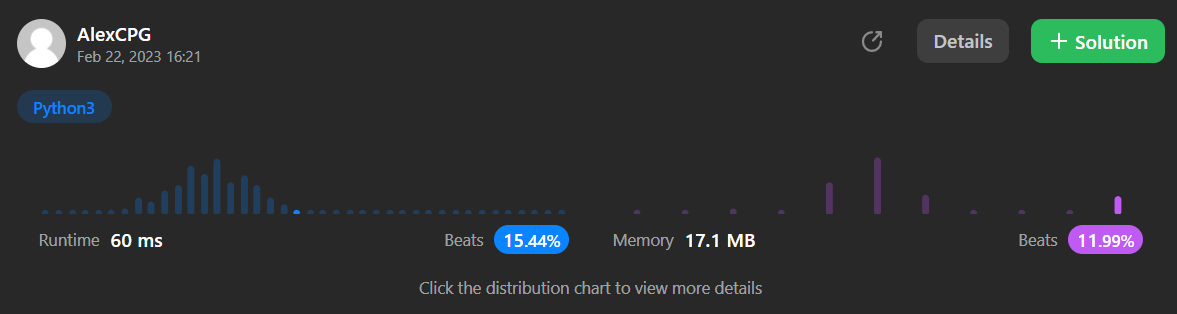